[__Colab Example__](https://www.dagshub.com/Dean/mlflow-colab-example)<br>
[__Startup Code__](https://dagshub.com/arindam.d.dey/my-first-repo/experiments/#/)

In [1]:
import dagshub
import mlflow
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

# Divide the data into features and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

# Define the sequential model.
model = tf.keras.models.Sequential()

# Add two fully-connected layers to the network.
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
#os.getenv('MLFLOW_TRACKING_PASSWORD')

In [4]:
dagshub.init('my-first-repo',
             'arindam.d.dey',
              mlflow=True)
mlflow.start_run()

Initialized MLflow to track repo "arindam.d.dey/my-first-repo"

Repository arindam.d.dey/my-first-repo initialized!

<ActiveRun: >

In [5]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_test, y_test))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3289 - accuracy: 0.9090 - val_loss: 0.1633 - val_accuracy: 0.9518
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1359 - accuracy: 0.9611 - val_loss: 0.1201 - val_accuracy: 0.9647
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0920 - accuracy: 0.9734 - val_loss: 0.0897 - val_accuracy: 0.9718
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0666 - accuracy: 0.9814 - val_loss: 0.0793 - val_accuracy: 0.9745
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0506 - accuracy: 0.9857 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0397 - accuracy: 0.9889 - val_loss: 0.0692 - val_accuracy: 0.9781
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0308 - accuracy: 0.9918 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9811
Test Accuracy: 0.9811000227928162
Test Loss: 0.061259496957063675


In [7]:
mlflow.log_metric("test_accuracy", test_accuracy)
mlflow.log_metric("test_loss", test_loss)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


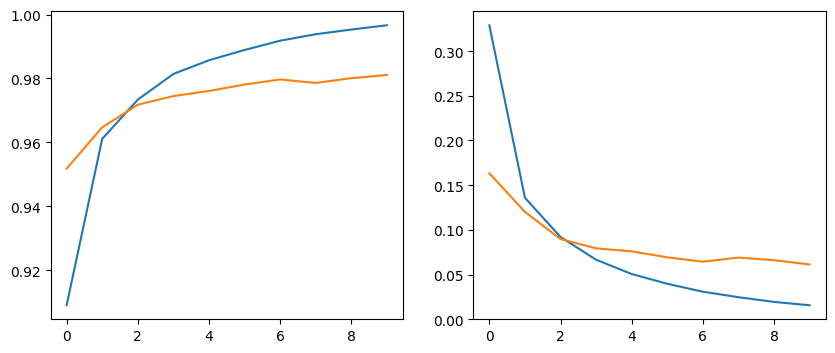

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])

In [10]:
mlflow.log_figure(fig,'plot.png')

In [11]:
mlflow.end_run()